# T4 Pareto-optimalty & Lexicographic order
- Select any 10 banks (from any country) and conduct research on loans or
deposits.
- Create a table of values by indicators/criteria (10 indicators; for example, minimum and maximum interest rate on a loan/deposit, maximum amount, etc.)
- Find the Pareto-optimal frontier.
- Sort the criteria by importance. Sort the banks and find the optimal solution (select a bank) according to lexicographic order


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'Bank': ['BBVA', 'Citibanamex', 'Santander', 'HSBC', 'Scotiabank', 'Banorte', 'Banco Azteca', 'Banregio', 'Inbursa', 'BanBajío'],
    'Minimum Annual Interest Rate': [25.75, 20, 16.51, 27.86, 33.14, 22, 50.5, 23.6, 23.47, 23.5],
    'Minimum CAT': [35.6, 30.62, 18.1, 36.9, 40.5, 28.6, 101.2, 27.4, 30.2, 52.3],
    'Maximum Loan Amount': [1500000, 750000, 3000000, 1200000, 500000, 1000000, 70000, 0, 1000000, 500000],
    'Maximum Loan Term': [72, 60, 72, 72, 60, 36, 154, 48, 60, 48],
    'Opening Fee': [2.75, 0, 0, 0, 2, 0, 0, 200, 0, 2],
    'Minimum Age': [18, 21, 18, 18, 22, 24, 18, 0, 0, 23],
    'Maximum Age': [84, 79, 81, 74, 76, 65, 75, 0, 70, 70],
    'Prepayment Capacity': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'Payment Frequency': ['Monthly', 'Monthly', 'Monthly', 'Monthly', 'Monthly', 'Monthly', 'Weekly/Biweekly', 'Monthly', 'Monthly', 'Monthly'],
    'Digital Services': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
}

df = pd.DataFrame(data)

# Find the Pareto-optimal Frontier

We have identified the banks that are on the Pareto frontier. These banks are not dominated by any other bank in terms of the considered criteria:

Banks on the Pareto Frontier:

- Citibanamex
- Santander
- Scotiabank
- Banorte
- Banco Azteca
- Banregio
- Inbursa
- BanBajío

In [ ]:
# Function to determine if a row is dominated by any other row for specific columns
def is_dominated(row, data, columns):
    for _, candidate in data.iterrows():
        if all(candidate[col] <= row[col] for col in columns) and any(candidate[col] < row[col] for col in columns):
            return True
    return False

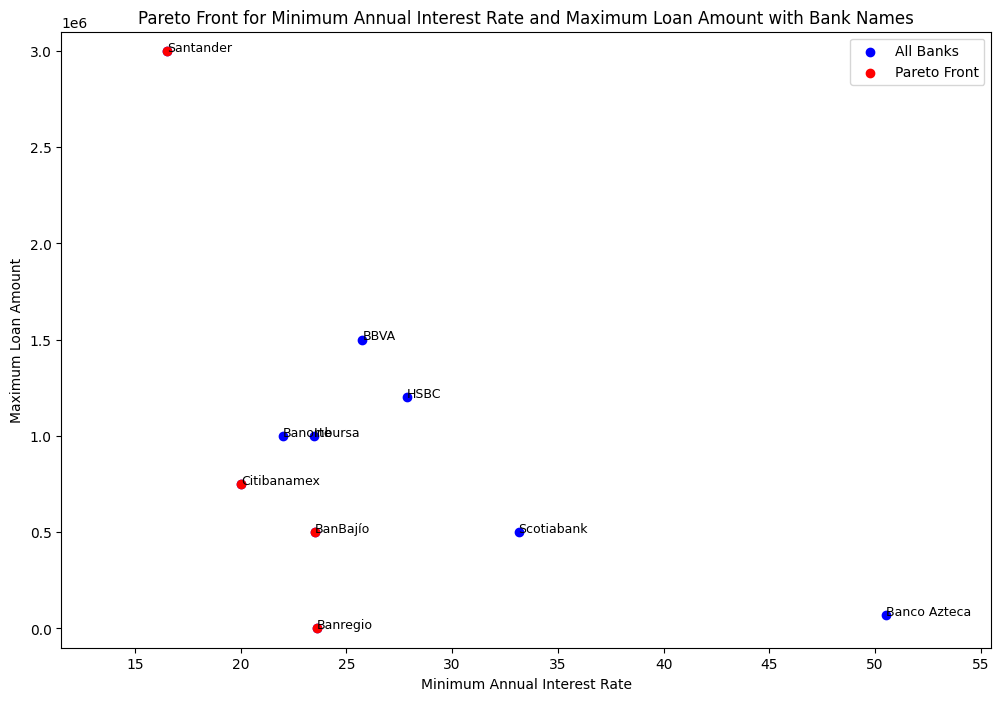

In [ ]:
# Find the Pareto front for specific columns
def find_pareto_front(data, columns):
    return [row['Bank'] for _, row in data.iterrows() if not is_dominated(row, data, columns)]

# Columns for the chosen criteria
chosen_columns = ['Minimum Annual Interest Rate', 'Maximum Loan Amount']

# Identify the Pareto front for the chosen criteria
pareto_front_chosen = find_pareto_front(df, chosen_columns)

# Filter the banks that are in the Pareto front for the chosen criteria
pareto_banks_chosen = df[df['Bank'].isin(pareto_front_chosen)]

# Sort the pareto banks for plotting line
pareto_banks_chosen = pareto_banks_chosen.sort_values(by=['Minimum Annual Interest Rate'])

# Plotting the Pareto front for the chosen criteria with bank names
plt.figure(figsize=(12, 8))
plt.scatter(df['Minimum Annual Interest Rate'], df['Maximum Loan Amount'], c='blue', label='All Banks')
plt.scatter(pareto_banks_chosen['Minimum Annual Interest Rate'], pareto_banks_chosen['Maximum Loan Amount'], c='red', label='Pareto Front')

# Adding bank names to the points
for i, bank in df.iterrows():
    plt.text(bank['Minimum Annual Interest Rate'], bank['Maximum Loan Amount'], bank['Bank'], fontsize=9)

# Adjust limits to ensure all points and text are visible
plt.xlim(df['Minimum Annual Interest Rate'].min() - 5, df['Minimum Annual Interest Rate'].max() + 5)
plt.ylim(df['Maximum Loan Amount'].min() - 100000, df['Maximum Loan Amount'].max() + 100000)

plt.xlabel('Minimum Annual Interest Rate')
plt.ylabel('Maximum Loan Amount')
plt.title('Pareto Front for Minimum Annual Interest Rate and Maximum Loan Amount with Bank Names')
plt.legend()
plt.show()



# Explanation
This chart compares ten banks in terms of their Minimum Annual Interest Rate and Maximum Loan Amount. The red dots represent banks on the Pareto front, indicating that these banks are not dominated by any other in both criteria. Santander, Citibanamex, BanBajío, and Banregio are on the Pareto front, meaning they offer a combination of interest rates and loan amounts that cannot be simultaneously improved by another bank in both aspects. The blue dots represent the remaining banks, which are dominated in at least one of the two criteria by the banks on the Pareto front.

# Sort the Criteria by Importance
We will use the following order of importance for the criteria:

- Minimum annual interest rate
- Minimum CAT (Total Annual Cost)
- Maximum loan amount
- Maximum loan term
- Opening fee
- Prepayment capacity
- Payment frequency
- Minimum age
- Maximum age
- Digital Services

Here are the banks on the Pareto frontier, sorted according to the lexicographic order of the criteria:

In [ ]:
# Identify the Pareto front for all criteria
all_criteria_columns = df.columns.drop('Bank')
pareto_front_all_criteria = find_pareto_front(df, all_criteria_columns)

# Filter the banks that are in the Pareto front for all criteria
pareto_banks_all_criteria = df[df['Bank'].isin(pareto_front_all_criteria)]

# Sort the banks according to the lexicographic order of the defined criteria
criteria_order = [
    'Minimum Annual Interest Rate',
    'Minimum CAT',
    'Maximum Loan Amount',
    'Maximum Loan Term',
    'Opening Fee',
    'Prepayment Capacity',
    'Payment Frequency',
    'Minimum Age',
    'Maximum Age',
    'Digital Services'
]

pareto_banks_sorted = pareto_banks_all_criteria.sort_values(by=criteria_order)
pareto_banks_sorted.reset_index(drop=True, inplace=True)

# Display the ordered results
pareto_banks_sorted[['Bank'] + criteria_order]

,Bank,Minimum Annual Interest Rate,Minimum CAT,Maximum Loan Amount,Maximum Loan Term,Opening Fee,Prepayment Capacity,Payment Frequency,Minimum Age,Maximum Age,Digital Services
0,Santander,16.51,18.10,3000000,72,0.0,Yes,Monthly,18,81,Yes
1,Citibanamex,20.00,30.62,750000,60,0.0,Yes,Monthly,21,79,Yes
2,Banorte,22.00,28.60,1000000,36,0.0,Yes,Monthly,24,65,Yes
3,Inbursa,23.47,30.20,1000000,60,0.0,Yes,Monthly,0,70,Yes
4,BanBajío,23.50,52.30,500000,48,2.0,Yes,Monthly,23,70,Yes
5,Banregio,23.60,27.40,0,48,200.0,Yes,Monthly,0,0,Yes
6,Scotiabank,33.14,40.50,500000,60,2.0,Yes,Monthly,22,76,Yes
7,Banco Azteca,50.50,101.20,70000,154,0.0,Yes,Weekly/Biweekly,18,75,Yes


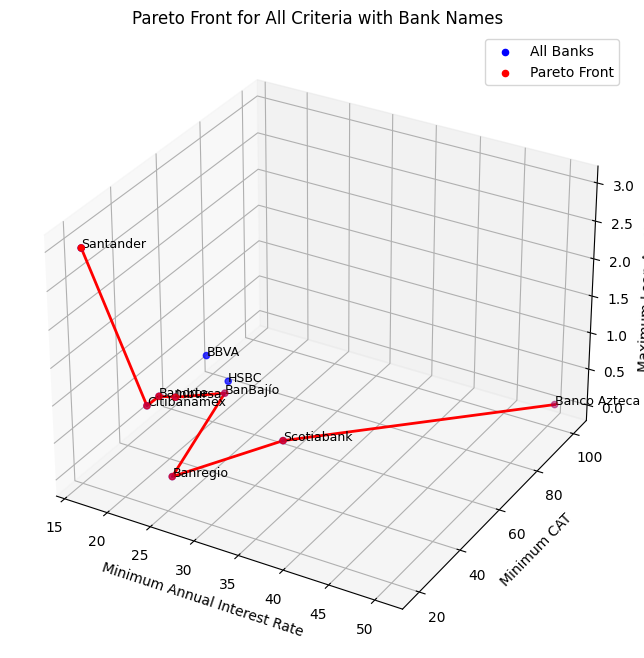

In [ ]:
# Plotting the Pareto front for all criteria in a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Minimum Annual Interest Rate'], df['Minimum CAT'], df['Maximum Loan Amount'], c='blue', label='All Banks')
ax.scatter(pareto_banks_all_criteria['Minimum Annual Interest Rate'], pareto_banks_all_criteria['Minimum CAT'], pareto_banks_all_criteria['Maximum Loan Amount'], c='red', label='Pareto Front')

# Adding line connecting Pareto front points
ax.plot(pareto_banks_sorted['Minimum Annual Interest Rate'], pareto_banks_sorted['Minimum CAT'], pareto_banks_sorted['Maximum Loan Amount'], color='red', linestyle='-', linewidth=2)

# Adding bank names to the points
for i, bank in df.iterrows():
    ax.text(bank['Minimum Annual Interest Rate'], bank['Minimum CAT'], bank['Maximum Loan Amount'], bank['Bank'], fontsize=9)

ax.set_xlabel('Minimum Annual Interest Rate')
ax.set_ylabel('Minimum CAT')
ax.set_zlabel('Maximum Loan Amount')
ax.set_title('Pareto Front for All Criteria with Bank Names')
ax.legend()
plt.show()

# Optimal Bank According to Lexicographic Analysis
The optimal bank, based on the lowest minimum annual interest rate and then sorting according to additional criteria in the order of importance defined, is:

***Santander***

# Conclusion
The analysis using all relevant criteria and sorting lexicographically shows that **Santander** is the most optimal bank for obtaining a personal loan. This result is based on the lowest minimum annual interest rate and other factors in the order of importance.

References:

- https://www.bbva.mx/personas/productos/creditos/prestamos-personales/prestamo-personal-inmediato.html

- https://www.banamex.com/es/personas/creditos/credito-personal.html

- https://www.santander.com.mx/personas/creditos-personales/prestamo-personal.html

- https://www.hsbc.com.mx/creditos/personales/nomina/

- https://www.scotiabank.com.mx/personas/creditos/prestamos-personales/prestamo-personal-scotiabank.aspx

- https://www.banorte.com/wps/portal/banorte/Home/creditos/credito-personal

- https://www.bancoazteca.com.mx/productos/prestamos/prestamos-personales.html

- https://www.banregio.com/personas/creditos-personales/regioprestamo.php

- https://www.inbursa.com/Portal/?page=Document/doc_view_section.asp&id_document=880&id_category=38

- https://www.bb.com.mx/webcenter/portal/BanBajio/personas/p-creditos/p-credito-personal?_afrLoop=10908498096878358&_afrWindowMode=0&Adf-Window-Id=rm8vzd1p0&_afrPage=0&_afrFS=16&_afrMT=screen&_afrMFW=1366&_afrMFH=641&_afrMFDW=1366&_afrMFDH=768&_afrMFC=8&_afrMFCI=0&_afrMFM=0&_afrMFR=96&_afrMFG=0&_afrMFS=0&_afrMFO=0